##### Import Essential Libraries

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

##### Defining f(u) and u(k)

In [2]:
# Parameters
steps = 700  # Total steps, with adaptation stopping at k=500

# Define the nonlinear function of the plant
def f(u):
    return 0.6 * np.sin(np.pi * u) + 0.3 * np.sin(3 * np.pi * u) + 0.1 * np.sin(5 * np.pi * u)

# Define the input function u(k)
def input_u(k):
    return np.sin(2 * np.pi * k / 250)

##### Building Neural Network

In [3]:
# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 20)   # Input layer with 20 hidden units
        self.fc2 = nn.Linear(20, 10)  # Hidden layer with 10 units
        self.fc3 = nn.Linear(10, 1)   # Output layer with 1 unit
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the network and define loss and optimizer
net = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.25)

##### Plant and Model Output Simulation with Neural Network Training

In [4]:
# Simulation for the plant output and model output with training
y_plant = np.zeros(steps)
y_model = np.zeros(steps)

# Initial conditions for the plant and model
y_plant[0] = 0
y_plant[1] = 0
y_model[0] = 0
y_model[1] = 0

# training and simulation
for k in range(2, steps):
    u_k = input_u(k)
    # Compute the plant output
    y_plant[k] = 0.3 * y_plant[k - 1] + 0.6 * y_plant[k - 2] + f(u_k)
    
    # Neural network prediction for the model
    input_tensor = torch.tensor([[u_k]], dtype=torch.float32)
    nn_output = net(input_tensor)  # Neural network approximation of f(u)
    y_model[k] = 0.3 * y_model[k - 1] + 0.6 * y_model[k - 2] + nn_output.item()
    
    # Update the network if k <= 500
    if k <= 500:
        target = torch.tensor([[f(u_k)]], dtype=torch.float32)
        loss = criterion(nn_output, target)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


##### Plotting

<>:6: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:6: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Roja\AppData\Local\Temp\ipykernel_32292\3853722320.py:6: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(range(k_start, k_end), y_model[k_start:k_end], label='$\hat{y}_p$ (Model output)', linestyle='--')  # Model output (neural network)
C:\Users\Roja\AppData\Local\Temp\ipykernel_32292\3853722320.py:9: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("Outputs $y_p$ and $\hat{y}_p$")


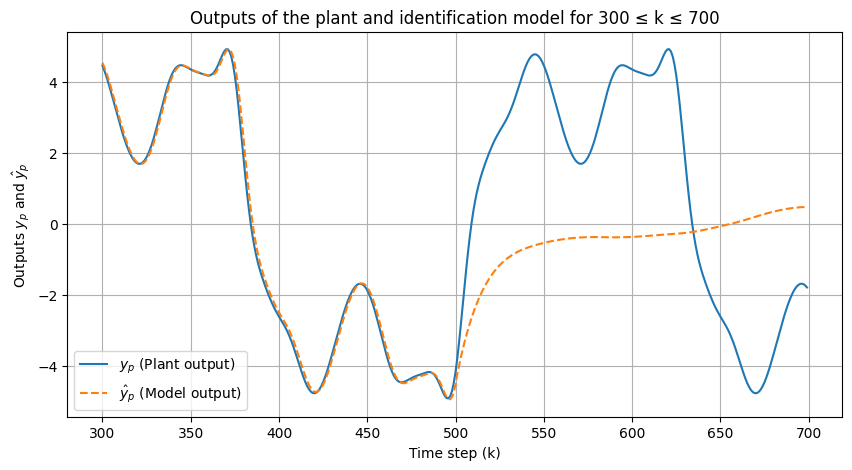

In [5]:
# Plot the results for the range 300 <= k <= 700
k_start = 300
k_end = 700
plt.figure(figsize=(10, 5))
plt.plot(range(k_start, k_end), y_plant[k_start:k_end], label='$y_p$ (Plant output)', linestyle='-')  # Plant output
plt.plot(range(k_start, k_end), y_model[k_start:k_end], label='$\hat{y}_p$ (Model output)', linestyle='--')  # Model output (neural network)

plt.xlabel("Time step (k)")
plt.ylabel("Outputs $y_p$ and $\hat{y}_p$")
plt.title("Outputs of the plant and identification model for 300 ≤ k ≤ 700")
plt.legend()
plt.grid()
plt.show()